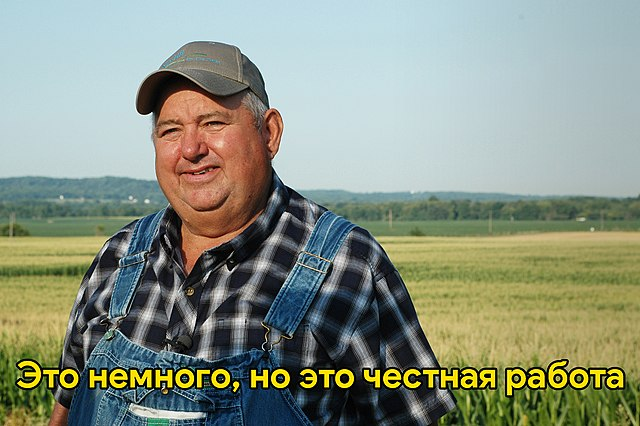

#Предобработка данных

In [ ]:
from copy import deepcopy
from pathlib import Path

import pandas as pd

pd.set_option("display.max_rows", 1000)

In [ ]:
!mv kaggle.json /root/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset

adult-income-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip adult-income-dataset.zip

Archive:  adult-income-dataset.zip
replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
dataset = pd.read_csv("adult.csv")

In [ ]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Предобработка категориальных данных

### General

In [ ]:
dataset.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
dataset['predclass'] = dataset['income']
del dataset['income']
dataset['education-num'] = dataset['educational-num']
del dataset['educational-num']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   gender          48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  predclass       48842 non-null  object
 14  education-num   48842 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
print('workclass', dataset.workclass.unique())
print('education', dataset.education.unique())
print('marital-status', dataset['marital-status'].unique())
print('occupation', dataset.occupation.unique())
print('relationship', dataset.relationship.unique())
print('race', dataset.race.unique())
print('gender', dataset.gender.unique())
print('native-country', dataset['native-country'].unique())
print('predclass', dataset.predclass.unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

### Education

In [ ]:
dataset['education'].replace('Preschool', 'dropout',inplace=True)
dataset['education'].replace('10th', 'dropout',inplace=True)
dataset['education'].replace('11th', 'dropout',inplace=True)
dataset['education'].replace('12th', 'dropout',inplace=True)
dataset['education'].replace('1st-4th', 'dropout',inplace=True)
dataset['education'].replace('5th-6th', 'dropout',inplace=True)
dataset['education'].replace('7th-8th', 'dropout',inplace=True)
dataset['education'].replace('9th', 'dropout',inplace=True)
dataset['education'].replace('HS-Grad', 'HighGrad',inplace=True)
dataset['education'].replace('HS-grad', 'HighGrad',inplace=True)
dataset['education'].replace('Some-college', 'CommunityCollege',inplace=True)
dataset['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
dataset['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
dataset['education'].replace('Bachelors', 'Bachelors',inplace=True)
dataset['education'].replace('Masters', 'Masters',inplace=True)
dataset['education'].replace('Prof-school', 'Masters',inplace=True)
dataset['education'].replace('Doctorate', 'Doctorate',inplace=True)

### Marital Status

In [ ]:
dataset['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
dataset['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
dataset['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
dataset['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
dataset['marital-status'].replace(['Separated'], 'Separated',inplace=True)
dataset['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
dataset['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [ ]:
del dataset['education-num']
dataset

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,25,Private,226802,dropout,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HighGrad,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,CommunityCollege,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,CommunityCollege,NotMarried,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,CommunityCollege,Married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HighGrad,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HighGrad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HighGrad,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#Обучение

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
dataset.drop('fnlwgt', axis=1, inplace=True)
le = LabelEncoder()
cat = ['education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'workclass', 'gender', 'predclass']
for c in cat:
    dataset[c] = le.fit_transform(dataset[c])
dataset

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,25,4,5,1,7,3,2,1,0,0,40,39,0
1,38,4,3,0,5,0,4,1,0,0,50,39,0
2,28,2,1,0,11,0,4,1,0,0,40,39,1
3,44,4,1,0,7,0,2,1,7688,0,40,39,1
4,18,0,1,1,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,1,0,13,5,4,0,0,0,38,39,0
48838,40,4,3,0,7,0,4,1,0,0,40,39,1
48839,58,4,3,3,1,4,4,0,0,0,40,39,0
48840,22,4,3,1,1,3,4,1,0,0,20,39,0


In [ ]:
y = dataset["predclass"]
X = dataset.drop('predclass', axis=1)
X.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,5,1,7,3,2,1,0,0,40,39
1,38,4,3,0,5,0,4,1,0,0,50,39
2,28,2,1,0,11,0,4,1,0,0,40,39
3,44,4,1,0,7,0,2,1,7688,0,40,39
4,18,0,1,1,0,3,4,0,0,0,30,39


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Обучим без PLE

In [ ]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('The accuracy of the Perceptron is', accuracy_score(y_pred,y_test))

The accuracy of the Perceptron is 0.7150168901627597


In [ ]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8458388780837343


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('The accuracy of MLPClassifier is', accuracy_score(y_pred,y_test))

The accuracy of MLPClassifier is 0.8032551950046064


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, verbose=False)
y_pred = cbc.predict(X_test)
print('The accuracy of the CatBoost Model is', accuracy_score(y_pred,y_test))

The accuracy of the CatBoost Model is 0.8708158460436073


## Сделаем теперь PLE

In [ ]:
dataset_q = dataset
num = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [ ]:
bin_numbers = 10
for c in num:
    c_min = dataset[c].min()
    c_max = dataset[c].max()
    for bin in range(bin_numbers):
        s = c + '_' + str(bin)
        right = c_min + (bin + 1) * (c_max - c_min) / bin_numbers 
        left = c_min + bin * (c_max - c_min) / bin_numbers
        dataset_q.loc[dataset_q[c] < left, s] = 0
        dataset_q.loc[dataset_q[c] >= left, s] = (dataset_q[c] - left) / (right - left)
        dataset_q.loc[right <= dataset_q[c], s] = 1
    dataset_q.drop(c, axis=1, inplace=True)

dataset_q

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,predclass,age_0,...,hours-per-week_0,hours-per-week_1,hours-per-week_2,hours-per-week_3,hours-per-week_4,hours-per-week_5,hours-per-week_6,hours-per-week_7,hours-per-week_8,hours-per-week_9
0,4,5,1,7,3,2,1,39,0,1.000000,...,1.0,1.000000,1.000000,0.979592,0.0,0.0,0.0,0.0,0.0,0.0
1,4,3,0,5,0,4,1,39,0,1.000000,...,1.0,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0,11,0,4,1,39,1,1.000000,...,1.0,1.000000,1.000000,0.979592,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0,7,0,2,1,39,1,1.000000,...,1.0,1.000000,1.000000,0.979592,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0,3,4,0,39,0,0.136986,...,1.0,1.000000,0.959184,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,4,1,0,13,5,4,0,39,0,1.000000,...,1.0,1.000000,1.000000,0.775510,0.0,0.0,0.0,0.0,0.0,0.0
48838,4,3,0,7,0,4,1,39,1,1.000000,...,1.0,1.000000,1.000000,0.979592,0.0,0.0,0.0,0.0,0.0,0.0
48839,4,3,3,1,4,4,0,39,0,1.000000,...,1.0,1.000000,1.000000,0.979592,0.0,0.0,0.0,0.0,0.0,0.0
48840,4,3,1,1,3,4,1,39,0,0.684932,...,1.0,0.938776,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = dataset["predclass"]
X = dataset.drop('predclass', axis=1)
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('The accuracy of MLPClassifier is', accuracy_score(y_pred,y_test))

The accuracy of MLPClassifier is 0.8498310983724024


In [ ]:
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('The accuracy of the Perceptron is', accuracy_score(y_pred,y_test))

The accuracy of the Perceptron is 0.8159484082301157


In [ ]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, verbose=False)
y_pred = cbc.predict(X_test)
print('The accuracy of the CatBoost Model is', accuracy_score(y_pred,y_test))

The accuracy of the CatBoost Model is 0.8716347630258983


##Попытка реализовать переодичную активацию

In [ ]:
from typing import Any, Callable, Literal, cast
import torch
from torch import Tensor
import torch.nn as nn


def cos_sin(x: Tensor) -> Tensor:
    return torch.cat([torch.cos(x), torch.sin(x)], -1)

class PeriodicOptions:
    n: int  # the output size is 2 * n
    sigma: float
    trainable: bool
    initialization: Literal['log-linear', 'normal']

class Periodic(nn.Module):
    def __init__(self, n_features: int, options: PeriodicOptions) -> None:
        super().__init__()
        if options.initialization == 'log-linear':
            coefficients = options.sigma ** (torch.arange(options.n) / options.n)
            coefficients = coefficients[None].repeat(n_features, 1)
        else:
            assert options.initialization == 'normal'
            coefficients = torch.normal(0.0, options.sigma, (n_features, options.n))
        if options.trainable:
            self.coefficients = nn.Parameter(coefficients)
        else:
            self.register_buffer('coefficients', coefficients)

    def forward(self, x: Tensor) -> Tensor:
        assert x.ndim == 2
        return cos_sin(2 * torch.pi * self.coefficients[None] * x[..., None])

In [ ]:
dataset_p = dataset


In [ ]:
import torch.nn.functional as F

class my_MLP(nn.Module):

    def __init__(self):

        super(self).__init__()

        ## This is the number of hidden nodes in each layer (512)

        hidden_1 = 512
        hidden_2 = 512

        self.p = Periodic()

        ## This is the linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28*28, 512)

        ## This is also linear layer but (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)

        ##This is the linear layer with (n_hidden -> 10)
        self.fc3 = nn.Linear(512, 2)

        
    def forward(self, x_num, x_cat):
        x_num = self.p(x_num)
        x = torch.concat(x_num, x_cat)

        ## adding the hidden layer, for activation we are using relu activation
        x = F.relu(self.fc1(x))

        ## adding the dropout layer
        x = self.droput(x)

        ## adding the hidden layer, for activation we are using relu activation
        x = F.relu(self.fc2(x))

        ## adding the dropout layer
        x = self.droput(x)

        ## adding the output layer
        x = self.fc3(x)

        return x

In [ ]:
import numpy as np

learning_rate = 0.01

MLP_model = my_MLP()
MLP_criterion = nn.CrossEntropyLoss()
Model_optimizer = torch.optim.SGD(MLP_model.parameters(),lr =learning_rate)
num_epochs = 50 

training_loader_batch = torch.utils.data.DataLoader(dataset_p, batch_size = 200)


for epoch in range(num_epochs): # monitoring the losses

    training_loss = 0
    MLP_model.train() ## here we are preparing the model for training


    for data, label in training_loader_batch: 

        Model_optimizer.zero_grad() ## Clearing the gradients or we can say making gradients to zero of all the optimized variables        
        output = MLP_model(data) ## forward passing as in this computing the predicted outputs by passing the inputs to the model
        loss = MLP_criterion(output, label) ## Calculating the loss
        loss.backward() ## backward pass, Computing the gradient of the loss w.r.t the parameters of the model
        Model_optimizer.step() ## a single step of optimization
        training_loss += loss.item() * data.size(0) ## updating the running training loss


#Итоги

Модель      | Без PLE | C PLE
------------|---------|--------
MLPerceptron| 0.8033  | 0.8498
Perceptron  | 0.7150  | 0.8159
CatBoost    | 0.8708  | 0.8716